# Data extraction for the Hamamatsu expert

Just pull the data out of the hdf mess

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import h5py
import pandas as pnd
import glob
import os

In [18]:
flist = sorted(glob.glob('/Users/esenes/eos/user/e/esenes/AWAKE_streak_data/*')); fnum = len(flist)

In [78]:
# init stuff
timestamps = []
streakImages = []
# parse all the files
for k, file in enumerate(flist):
    if np.mod(k,100) == 0:
        print('Processing file '+str(k)+str('/')+str(fnum))
    f = h5py.File(file, 'r')
    timestamps.append(f['AwakeEventInfo']['timestamp'].value)

    # search for when the streak camera was on
    if type(f['AwakeEventData']['XMPP-STREAK']['StreakImage']) == h5py._hl.group.Group: 
        # dump to a dictionary and append it to the array
        tmp_dict = dict()
        for key in list(f['AwakeEventData']['XMPP-STREAK']['StreakImage'].keys()):
            tmp_dict[key] = f['AwakeEventData']['XMPP-STREAK']['StreakImage'][key].value
        streakImages.append(tmp_dict)
        del(tmp_dict)
    else:
        streakImages.append(None)

    f.close()
    
print('Done.')

Processing file 0/2112
Processing file 100/2112
Processing file 200/2112
Processing file 300/2112
Processing file 400/2112
Processing file 500/2112
Processing file 600/2112
Processing file 700/2112
Processing file 800/2112
Processing file 900/2112
Processing file 1000/2112
Processing file 1100/2112
Processing file 1200/2112
Processing file 1300/2112
Processing file 1400/2112
Processing file 1500/2112
Processing file 1600/2112
Processing file 1700/2112
Processing file 1800/2112
Processing file 1900/2112
Processing file 2000/2112
Processing file 2100/2112
Done.


In [103]:
streakImages[1440]['streakImageInfo'][0]

b'[application],enconding=utf-8,date="02/11/2018",time="14:09:17.669",software="hpd-ta",application=2,applicationtitle="high performance digital temporal analyzer",softwareversion="9.5 pf2",softwaredate="29.03.2018"[camera],amd=e,emd=e,smd=w,spx=2,atp=p,ssp=h,esc=b,atg=o,csw=o,oss=l,pec=f,atd=0,obn=2,omd=a,sdv="512,0,512",timingmode="external timing",triggermode="edge trigger",triggersource="bnc",triggerpolarity="pos.",binning="2 x 2",scanmode="subarray",subarrayhwidthvalue=1344,subarrayvwidthvalue=1024,binningvalue=1,scanmodevalue=2,triggerglobalexposure="global reset",cooling="on",defectpixelcorrection="off",triggerindelay="0",framebundlenumber="2",trigger1outsignal="low",trigger1outref="end of sensor readout",trigger1outpolarity="negative",trigger1outdelay="0",trigger1outwidth="0.00001",trigger2outsignal="low",trigger2outref="end of sensor readout",trigger2outpolarity="negative",trigger2outdelay="0",trigger2outwidth="0.00001",trigger3outsignal="low",trigger3outref="end of sensor rea

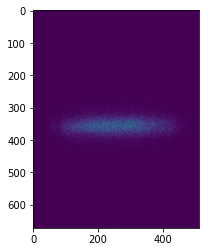

In [100]:
plt.imshow(np.reshape(streakImages[1440]['streakImageData'], (512, 672)).T)

In [107]:
import pickle
with open('example.pkl', 'wb') as f:
    pickle.dump(streakImages[1440], f, pickle.HIGHEST_PROTOCOL)

In [113]:
with open('example.pkl', 'rb') as f:
    myFile = pickle.load(f)

In [115]:
ll

{'streakImageBinning': array([b'2 x 2'], dtype='|S5'),
 'streakImageData': array([436, 417, 430, ..., 410, 431, 419], dtype=int32),
 'streakImageExposureTime': array([b'10 ms'], dtype='|S5'),
 'streakImageHeight': array([512]),
 'streakImageInfo': array([b'[application],enconding=utf-8,date="02/11/2018",time="14:09:17.669",software="hpd-ta",application=2,applicationtitle="high performance digital temporal analyzer",softwareversion="9.5 pf2",softwaredate="29.03.2018"[camera],amd=e,emd=e,smd=w,spx=2,atp=p,ssp=h,esc=b,atg=o,csw=o,oss=l,pec=f,atd=0,obn=2,omd=a,sdv="512,0,512",timingmode="external timing",triggermode="edge trigger",triggersource="bnc",triggerpolarity="pos.",binning="2 x 2",scanmode="subarray",subarrayhwidthvalue=1344,subarrayvwidthvalue=1024,binningvalue=1,scanmodevalue=2,triggerglobalexposure="global reset",cooling="on",defectpixelcorrection="off",triggerindelay="0",framebundlenumber="2",trigger1outsignal="low",trigger1outref="end of sensor readout",trigger1outpolarity="ne